In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib agg

import visualization
from data import datasets, evaluation
import transformations
import jax
import jax.numpy as jnp
import flax.linen as nn
from flax.core import freeze
import optax
import inference
from utils import settings
import numpy as np

rng_key = jax.random.PRNGKey(0)

In [2]:
dataset = datasets.Izmailov()
#dataset = datasets.Sinusoidal()

In [3]:
model_transformation = transformations.Sequential([
    nn.Dense(3),
    nn.tanh,
    nn.Dense(1)
])

In [4]:
# optimization
point_estimates = []
for j in range(16):
    rng_key, rng_key_ = jax.random.split(rng_key)
    
    point_estimate = inference.PointEstimate(
        model_transformation=model_transformation,
        dataset=dataset,
        optimizer = optax.adam(learning_rate=0.001),
        rng_key=rng_key_
    )

    parameters, optimizer_state = point_estimate.run(
        loss_function=inference.ridge_loss,
        epochs=6001,
        report_at=100
    )
    point_estimates.append(point_estimate)

epoch 0 loss: 68.13506317138672
epoch 100 loss: 26.8352108001709
epoch 200 loss: -13.168538093566895
epoch 300 loss: -54.03512191772461
epoch 400 loss: -95.61776733398438
epoch 500 loss: -137.50390625
epoch 600 loss: -179.31704711914062
epoch 700 loss: -220.8601531982422
epoch 800 loss: -262.1065673828125
epoch 900 loss: -303.1260681152344
epoch 1000 loss: -343.79998779296875
epoch 1100 loss: -383.2577819824219
epoch 1200 loss: -419.33929443359375
epoch 1300 loss: -449.861083984375
epoch 1400 loss: -474.7808837890625
epoch 1500 loss: -495.0319519042969
epoch 1600 loss: -511.1842041015625
epoch 1700 loss: -523.6743774414062
epoch 1800 loss: -533.066162109375
epoch 1900 loss: -540.0191040039062
epoch 2000 loss: -545.2001342773438
epoch 2100 loss: -549.2080688476562
epoch 2200 loss: -552.5475463867188
epoch 2300 loss: -555.6489868164062
epoch 2400 loss: -558.904052734375
epoch 2500 loss: -562.7005004882812
epoch 2600 loss: -567.4248046875
epoch 2700 loss: -573.4678344726562
epoch 2800 los

epoch 4900 loss: -622.786376953125
epoch 5000 loss: -622.9812622070312
epoch 5100 loss: -623.1508178710938
epoch 5200 loss: -623.2996826171875
epoch 5300 loss: -623.4315795898438
epoch 5400 loss: -623.55078125
epoch 5500 loss: -623.6614379882812
epoch 5600 loss: -623.7684326171875
epoch 5700 loss: -623.876953125
epoch 5800 loss: -623.9935302734375
epoch 5900 loss: -624.1262817382812
epoch 6000 loss: -624.2846069335938
epoch 0 loss: 308.56768798828125
epoch 100 loss: 206.6731414794922
epoch 200 loss: 125.35012817382812
epoch 300 loss: 34.64053726196289
epoch 400 loss: -54.02866744995117
epoch 500 loss: -131.3171844482422
epoch 600 loss: -196.92478942871094
epoch 700 loss: -253.62643432617188
epoch 800 loss: -302.9780578613281
epoch 900 loss: -345.46917724609375
epoch 1000 loss: -381.7821044921875
epoch 1100 loss: -413.38604736328125
epoch 1200 loss: -441.7408752441406
epoch 1300 loss: -467.4955749511719
epoch 1400 loss: -490.7657470703125
epoch 1500 loss: -511.5635986328125
epoch 1600 l

epoch 3700 loss: -638.6787719726562
epoch 3800 loss: -643.0293579101562
epoch 3900 loss: -648.0062255859375
epoch 4000 loss: -652.2562866210938
epoch 4100 loss: -655.4673461914062
epoch 4200 loss: -657.8230590820312
epoch 4300 loss: -659.5738525390625
epoch 4400 loss: -660.8772583007812
epoch 4500 loss: -661.872802734375
epoch 4600 loss: -662.6500854492188
epoch 4700 loss: -663.2781982421875
epoch 4800 loss: -663.7858276367188
epoch 4900 loss: -664.2054443359375
epoch 5000 loss: -664.553466796875
epoch 5100 loss: -664.8475952148438
epoch 5200 loss: -665.0928955078125
epoch 5300 loss: -665.3005981445312
epoch 5400 loss: -665.4739379882812
epoch 5500 loss: -665.6203002929688
epoch 5600 loss: -665.741943359375
epoch 5700 loss: -665.8458251953125
epoch 5800 loss: -665.932861328125
epoch 5900 loss: -666.0043334960938
epoch 6000 loss: -666.05615234375
epoch 0 loss: 112.55322265625
epoch 100 loss: 47.82537078857422
epoch 200 loss: -7.148831844329834
epoch 300 loss: -55.08634948730469
epoch 40

epoch 2400 loss: -541.0897827148438
epoch 2500 loss: -542.9376220703125
epoch 2600 loss: -544.911376953125
epoch 2700 loss: -547.09375
epoch 2800 loss: -549.5696411132812
epoch 2900 loss: -552.3636474609375
epoch 3000 loss: -555.3560180664062
epoch 3100 loss: -558.292724609375
epoch 3200 loss: -560.9227905273438
epoch 3300 loss: -563.1273803710938
epoch 3400 loss: -564.9296264648438
epoch 3500 loss: -566.4223022460938
epoch 3600 loss: -567.6994018554688
epoch 3700 loss: -568.8304443359375
epoch 3800 loss: -569.8627319335938
epoch 3900 loss: -570.8308715820312
epoch 4000 loss: -571.7626342773438
epoch 4100 loss: -572.68017578125
epoch 4200 loss: -573.5966186523438
epoch 4300 loss: -574.5067749023438
epoch 4400 loss: -575.382080078125
epoch 4500 loss: -576.1859130859375
epoch 4600 loss: -576.8998413085938
epoch 4700 loss: -577.5303955078125
epoch 4800 loss: -578.0984497070312
epoch 4900 loss: -578.6273803710938
epoch 5000 loss: -579.1393432617188
epoch 5100 loss: -579.6678466796875
epoch

epoch 1200 loss: -464.5041198730469
epoch 1300 loss: -484.2489929199219
epoch 1400 loss: -502.6146240234375
epoch 1500 loss: -518.9584350585938
epoch 1600 loss: -530.1563110351562
epoch 1700 loss: -534.7268676757812
epoch 1800 loss: -536.8065795898438
epoch 1900 loss: -538.2634887695312
epoch 2000 loss: -539.5928344726562
epoch 2100 loss: -540.9083862304688
epoch 2200 loss: -542.234130859375
epoch 2300 loss: -543.5713500976562
epoch 2400 loss: -544.9155883789062
epoch 2500 loss: -546.2614135742188
epoch 2600 loss: -547.6043090820312
epoch 2700 loss: -548.9415893554688
epoch 2800 loss: -550.2728271484375
epoch 2900 loss: -551.6000366210938
epoch 3000 loss: -552.926513671875
epoch 3100 loss: -554.2554931640625
epoch 3200 loss: -555.5888671875
epoch 3300 loss: -556.9262084960938
epoch 3400 loss: -558.2669067382812
epoch 3500 loss: -559.6130981445312
epoch 3600 loss: -560.974853515625
epoch 3700 loss: -562.3753051757812
epoch 3800 loss: -563.8595581054688
epoch 3900 loss: -565.502990722656

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 144.96it/s]


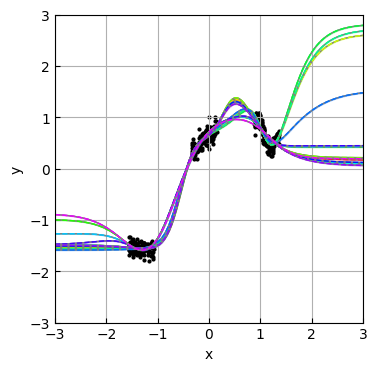

In [5]:
parameters_list = []
for i in range(len(point_estimates)):
    parameters_transformation = jax.tree_util.tree_reduce(lambda a, b: jnp.concatenate([a.flatten(), b.flatten()]), point_estimates[i].parameters["transformation"])[jnp.newaxis]
    parameters_list.append(parameters_transformation)

figure = visualization.RegressionFigure(
    settings=settings.SettingsRegressionFigure(
        settings_plot=settings.SettingsPlot(
            alpha=1.0,
            aleatoric=False,
            epistemic=True
        )
    ),
)
figure.plot(
    dataset=dataset,
    transformation=model_transformation.apply_from_vector,
    parameters_list=parameters_list,
    std=jnp.exp(parameters["log_std"])
)

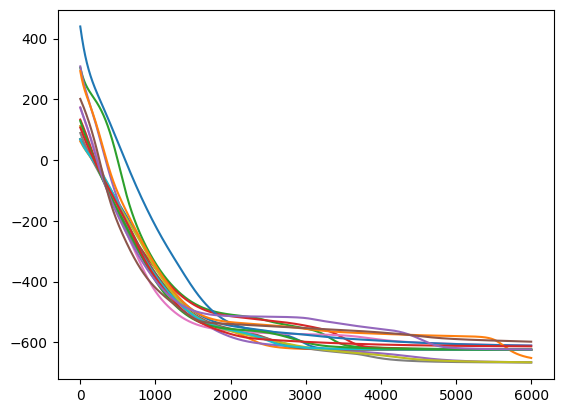

In [6]:
import matplotlib.pyplot as plt
figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
for i in range(len(point_estimates)):
    history = point_estimates[i].history
    ax.plot(history[:, 0], history[:, 1])
figure

[[ 2.4546428   2.0951173  -1.1088349  -2.1184003   1.4637566  -1.5603764
  -0.34243602  0.4502504  -1.0723566  -2.0579603 ]]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.15it/s]


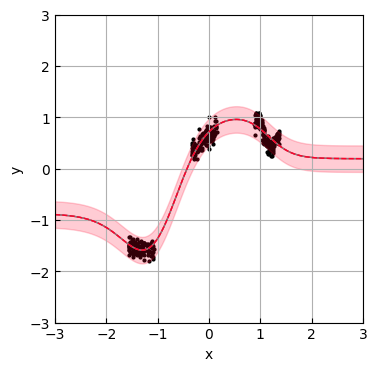

In [7]:
parameters_transformation = jax.tree_util.tree_reduce(lambda a, b: jnp.concatenate([a.flatten(), b.flatten()]), parameters["transformation"])[jnp.newaxis]
print(parameters_transformation)

figure = visualization.RegressionFigure(
    settings=settings.SettingsRegressionFigure(
        settings_plot=settings.SettingsPlot(
            alpha=1.0,
            aleatoric=True
        )
    ),
)
figure.plot(dataset=dataset, transformation=model_transformation.apply_from_vector, parameters_list=[parameters_transformation], std=jnp.exp(parameters["log_std"]))